In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('DS2_C5_S3_HR_Data_Practice.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


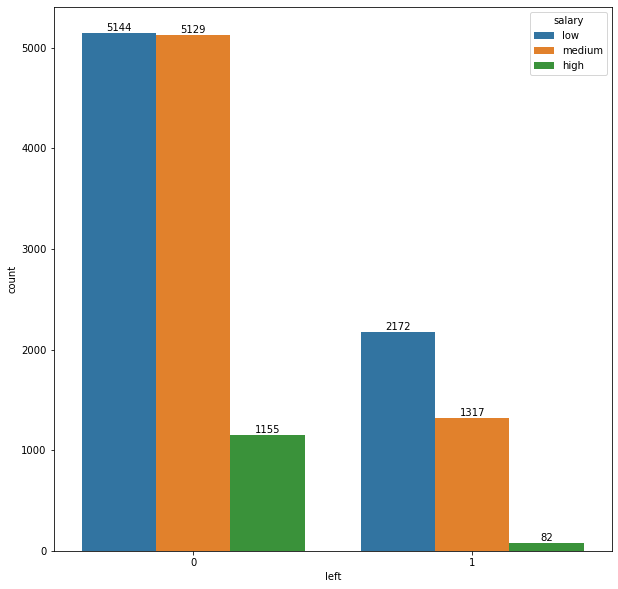

In [67]:
# task 1 a)

plt.figure(figsize=(10,10))
z = sns.countplot(df['left'], hue = df['salary'])
for bar in z.patches:
    percentage = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    z.annotate(percentage, (x,y), va="bottom", ha="center")

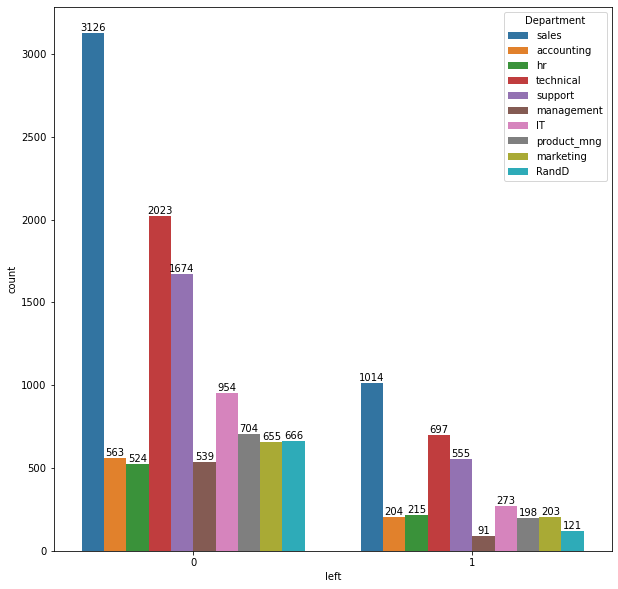

In [68]:
# b)

plt.figure(figsize=(10,10))
z = sns.countplot(x = 'left', hue='Department', data=df)
for bar in z.patches:
    val = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    z.annotate(val,(x,y),va = 'bottom' , ha = 'center')

In [69]:
# task 2 a)

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [70]:
# b)

column_correlation = df.corr()
column_correlation

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


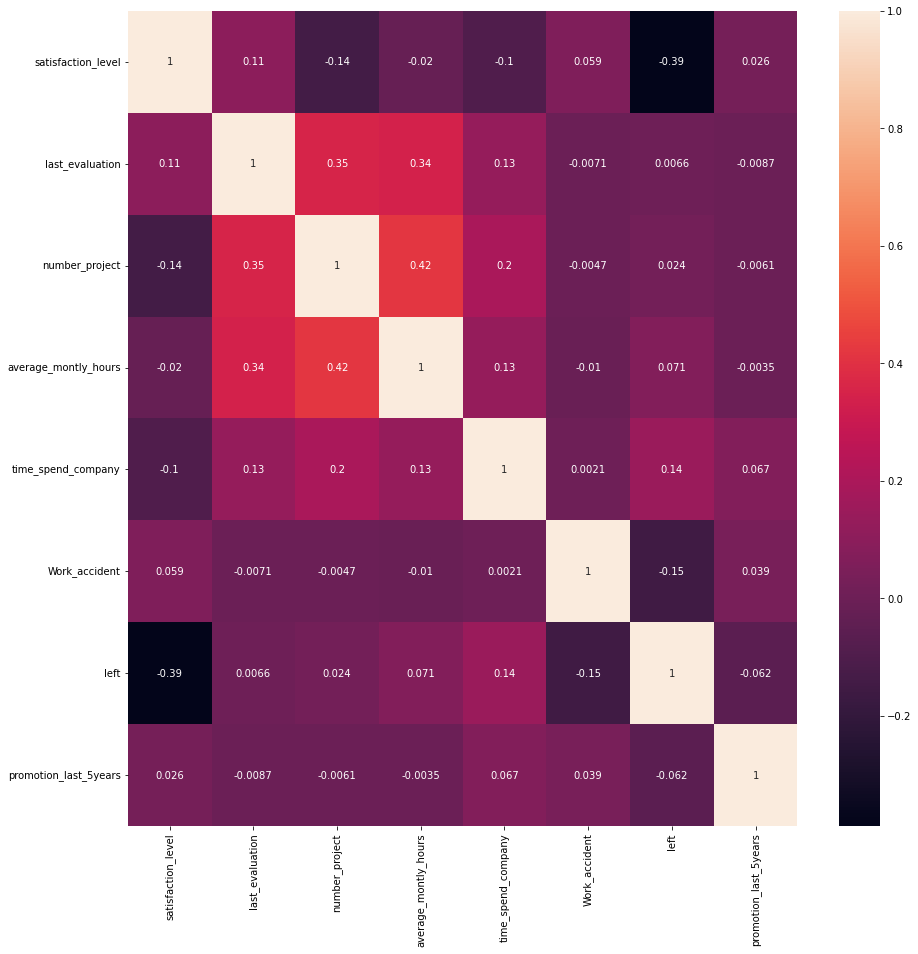

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(column_correlation, annot = True);

In [48]:
# c)

le = preprocessing.LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['salary'] = le.fit_transform(df['salary'])

In [49]:
# task 3 a)

a_train, a_test = train_test_split(df,train_size = 0.8)
print('Size of training dataset: ', a_train.shape)
print('Size of test dataset: ', a_test.shape)

Size of training dataset:  (11999, 10)
Size of test dataset:  (3000, 10)


In [72]:
X_train = a_train.drop(columns='left', axis =1)
Y_train = a_train['left']
X_test = a_test.drop(columns='left', axis =1)
Y_test = a_test['left']
X_train.shape, Y_train.shape, X_test.shape

((11999, 9), (11999,), (3000, 9))

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred = logreg.predict(X_test)
#Calculating the accuracy of the training dataset
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

76.9

In [56]:
# task 4

print(confusion_matrix(Y_test,Y_pred))
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[2059  192]
 [ 543  206]]
2059 192 543 206


In [57]:
print('accuracy:', accuracy_score(Y_test, Y_pred))
print('recall:', recall_score(Y_test, Y_pred))
print('f1-score:', f1_score(Y_test, Y_pred))
print('precision:', precision_score(Y_test, Y_pred))

accuracy: 0.755
recall: 0.2750333778371162
f1-score: 0.35919790758500436
precision: 0.5175879396984925


In [58]:
roc=roc_auc_score(Y_test, logreg.predict_proba(X_test)[:,1])
roc

0.7908717620828957

In [60]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# calculate AUC
auc = roc_auc_score(Y_test, Y_pred)
print('AUC: %.3f' % auc)

AUC: 0.595
